In [30]:
import torch
from custom_classes import Splatter, Splatter_Non_Sparse, Save_Output
import time
import numpy as np
import matplotlib.pyplot as plt

In [31]:
def sparse_matrix(sparcity = .5, rows = 25, cols = 25, batches = 100):
    return  (torch.rand(size=(batches,1,rows,cols)) < sparcity).float()

In [32]:
model_normal = torch.nn.Sequential(
    torch.nn.Conv2d(1,1,3)
)

model_splatter = Splatter(3,3)

model_splatter_non_sparse = Splatter_Non_Sparse(3,3)


In [33]:
input = sparse_matrix(sparcity=.9)

print(input.count_nonzero())
print(input.numel())

tensor(56143)
62500


In [34]:
def get_sparcity(tensor):
    return float(1-(tensor.count_nonzero().item())/float(tensor.numel()))

In [35]:
get_sparcity(input)

0.10171200000000002

In [36]:
model_normal_8_layer = torch.nn.Sequential(
    torch.nn.Conv2d(1,1,3),
    torch.nn.Conv2d(1,1,3),
    torch.nn.Conv2d(1,1,3),
    torch.nn.Conv2d(1,1,3),
    torch.nn.Conv2d(1,1,3),
    torch.nn.Conv2d(1,1,3),
    torch.nn.Conv2d(1,1,3)
)

model_splatter_8_layer = torch.nn.Sequential(

    Save_Output("outputs0.csv"),
    Splatter(3,3),
    Save_Output("outputs1.csv"),
    Splatter(3,3),
    Save_Output("outputs2.csv"),
    Splatter(3,3),
    Save_Output("outputs3.csv"),
    Splatter(3,3),
    Save_Output("outputs4.csv"),
    Splatter(3,3),
    Save_Output("outputs5.csv"),
    Splatter(3,3),
    Save_Output("outputs6.csv"),
    Splatter(3,3),
    Save_Output("outputs7.csv"),
    Splatter(3,3),
    Save_Output("outputs8.csv")

)

model_splatter_relu_8_layer = torch.nn.Sequential(

    Save_Output("outputsr0.csv"),
    Splatter(3,3),
    Save_Output("outputsr1.csv"),
    Splatter(3,3),
    Save_Output("outputsr2.csv"),
    Splatter(3,3),
    Save_Output("outputsr3.csv"),
    Splatter(3,3),
    Save_Output("outputsr4.csv"),
    Splatter(3,3),
    Save_Output("outputsr5.csv"),
    Splatter(3,3),
    Save_Output("outputsr6.csv"),
    Splatter(3,3),
    Save_Output("outputsr7.csv"),
    Splatter(3,3),
    Save_Output("outputsr8.csv")

)



In [37]:
torch.manual_seed(42)
sparsity = np.linspace(0,.95,50)
splatter_8_layer_times = []
normal_8_layer_times = []
output_sparsity = []
splatter_non_sparse_8_layer_times = []
for i in sparsity:
    input = sparse_matrix(sparcity=i, batches= 100, rows= 64, cols = 64)
    output = model_splatter_8_layer(input)
    output = model_splatter_relu_8_layer(input)


In [38]:
files = []
for i in range(9):
    filename = "outputs" + str(i) + ".csv"
    files.append(open(filename, "r"))
data = []
for file in files:
    data.append( [float(s) for s in file.readline().split(sep=',') if '.' in s])


In [39]:
import pandas as pd
my_data = {}
for index, values in enumerate(data):
    name = "layer " + str(index)
    my_data[name] = values

df = pd.DataFrame(my_data, index = (1-sparsity))



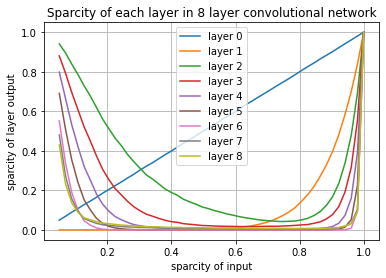

In [40]:
df.plot()
plt.title("Sparcity of each layer in 8 layer convolutional network")
plt.xlabel("sparcity of input")
plt.ylabel("sparcity of layer output")
plt.grid()

In [41]:
import os
for file in files:
    file.close()
    os.remove(file.name)

In [42]:
files = []
for i in range(9):
    filename = "outputsr" + str(i) + ".csv"
    files.append(open(filename, "r"))
data = []
for file in files:
    data.append( [float(s) for s in file.readline().split(sep=',') if '.' in s])


In [43]:
my_data = {}
for index, values in enumerate(data):
    name = "layer " + str(index)
    my_data[name] = values

df = pd.DataFrame(my_data, index = (1-sparsity))

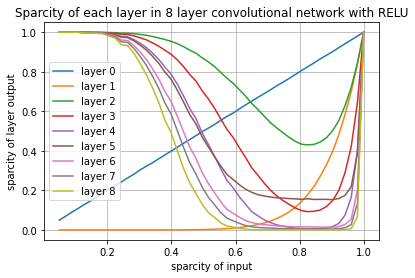

In [44]:
df.plot()
plt.title("Sparcity of each layer in 8 layer convolutional network with RELU")
plt.xlabel("sparcity of input")
plt.ylabel("sparcity of layer output")
plt.grid()

In [45]:
import os
for file in files:
    file.close()
    os.remove(file.name)